In [16]:
import pandas as pd 
import numpy as np 
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import seaborn

In [5]:
pd.options.display.max_columns = 60

In [6]:
df = pd.read_csv('./Data/features_30_sec.csv')
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [7]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (1000, 60)
Count of Positive and Negative samples


,label,count
0,blues,100
1,classical,100
2,country,100
3,disco,100
4,hiphop,100
5,jazz,100
6,metal,100
7,pop,100
8,reggae,100
9,rock,100


In [8]:
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


In [9]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

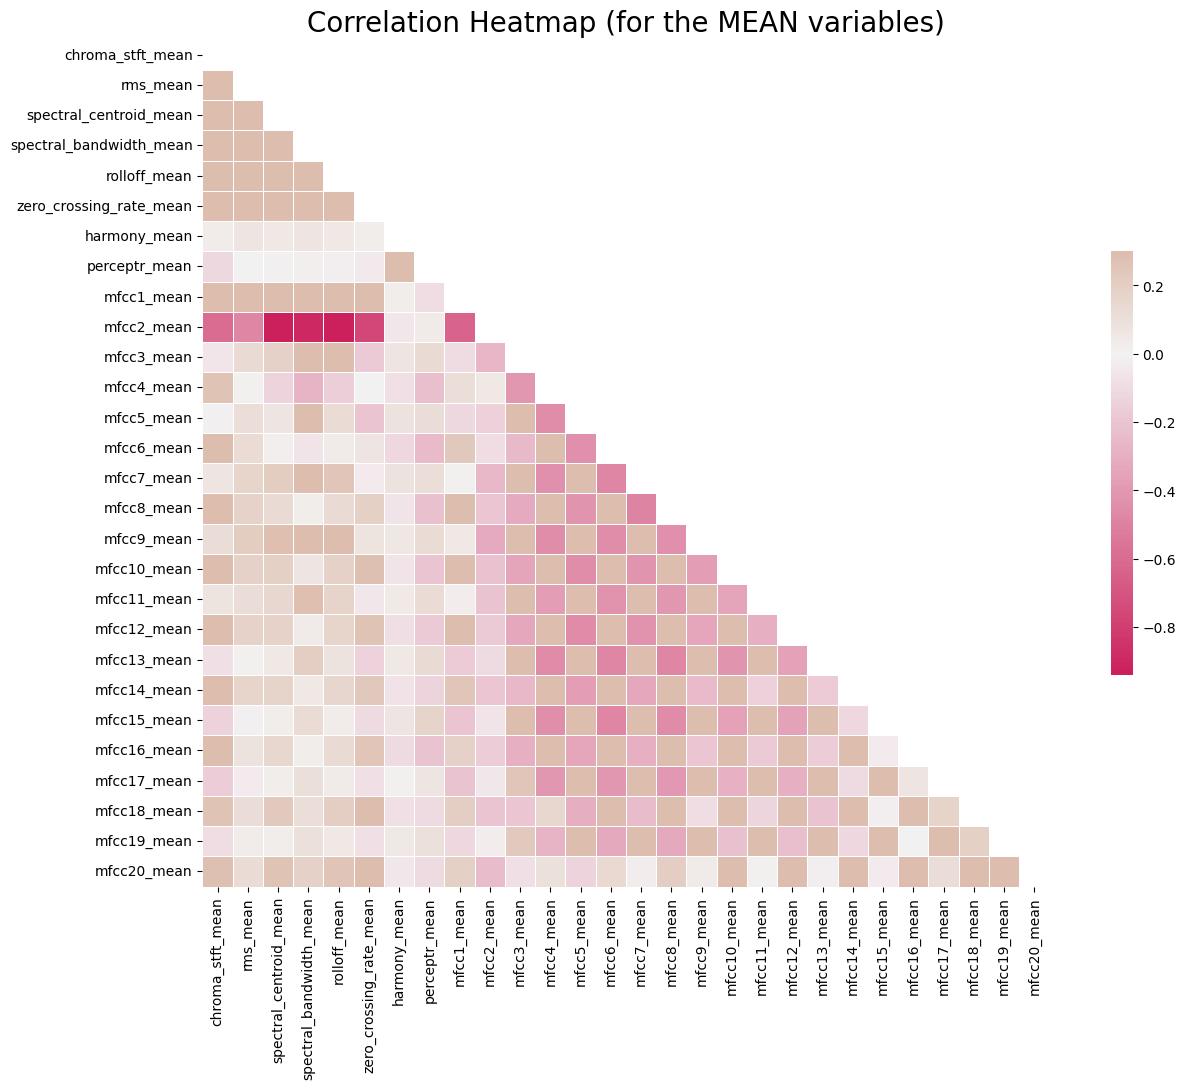

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig("Corr_Heatmap.png")

C:\Users\subas\AppData\Local\Temp\ipykernel_6896\3760914025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');


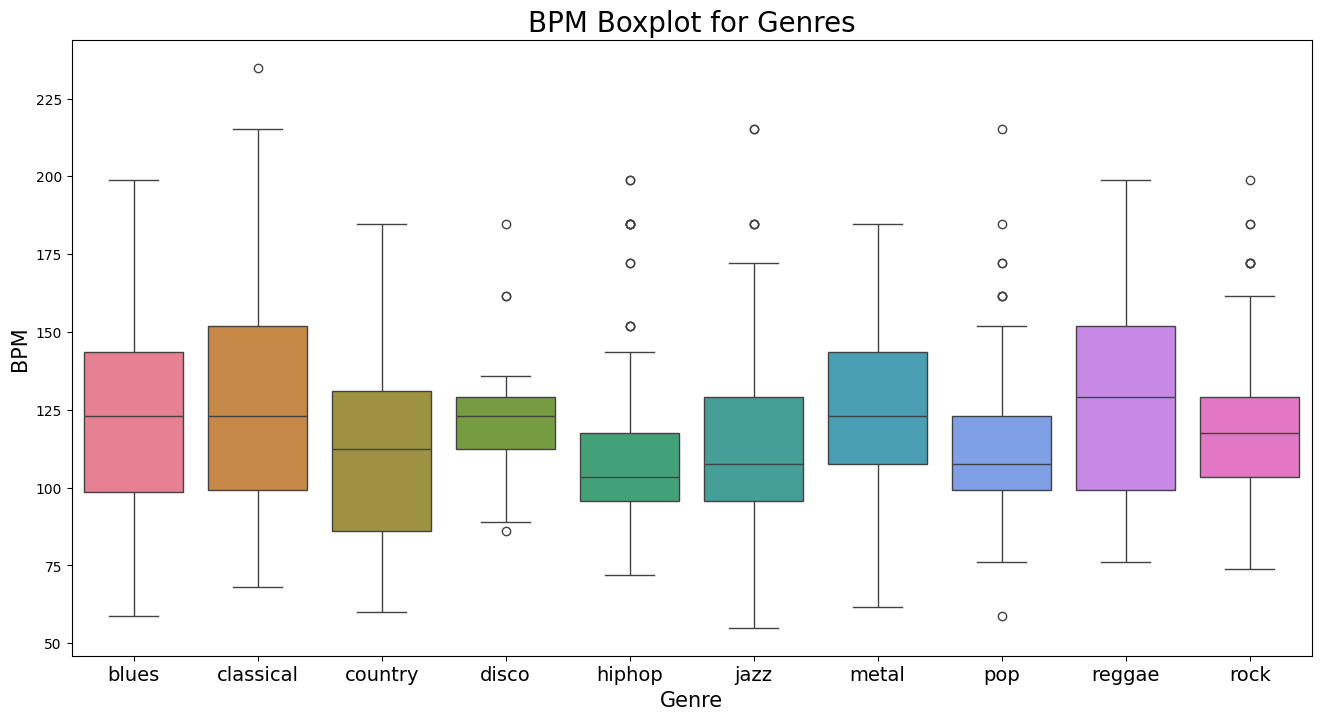

In [13]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

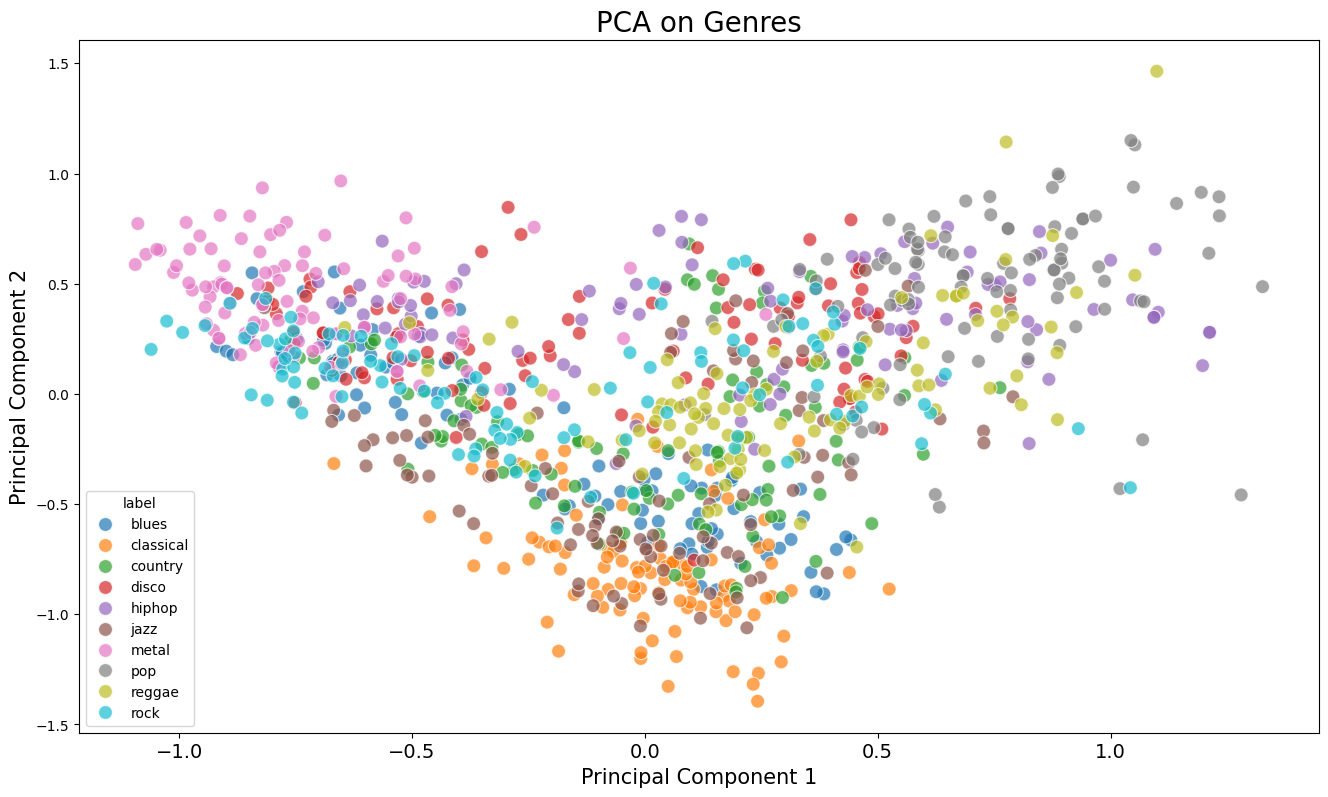

In [14]:
import sklearn.preprocessing as skp
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

In [15]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [3]:
Genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

audio_filepath = './Data/genres_original'

In [17]:
def extract_desired_features(file_path):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)

        # Extract features
        features = {
            'filename': os.path.basename(file_path),
            'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
            'rms_mean': np.mean(librosa.feature.rms(y=y)),
            'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
            'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
            'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
            'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y)),
            'harmony_mean': np.mean(librosa.effects.harmonic(y)),
            'perceptr_mean': np.mean(librosa.effects.percussive(y)),
            'tempo': librosa.beat.tempo(y=y, sr=sr)[0],
        }

        # Extract MFCCs (1-20)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        for i in range(1, 21):
            features[f'mfcc_{i}'] = np.mean(mfccs[i - 1, :])

        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [18]:
# Path to audio directory
audio_directory = './Data/genres_original'

# Extract features for all files
data = []
for genre in os.listdir(audio_directory):
    genre_folder = os.path.join(audio_directory, genre)
    if os.path.isdir(genre_folder):
        for file in os.listdir(genre_folder):
            if file.endswith('.wav'):  # Ensure it's an audio file
                file_path = os.path.join(genre_folder, file)
                features = extract_desired_features(file_path)
                if features:
                    features['label'] = genre  # Add genre as the label
                    data.append(features)

# Convert to DataFrame
features_df = pd.DataFrame(data)

# Save to CSV
features_df.to_csv('extracted_features.csv', index=False)
print("Feature extraction complete. Saved to 'extracted_features.csv'.")


C:\Users\subas\AppData\Local\Temp\ipykernel_6896\2357574198.py:17: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  'tempo': librosa.beat.tempo(y=y, sr=sr)[0],
C:\Users\subas\AppData\Local\Temp\ipykernel_6896\2357574198.py:17: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  'tempo': librosa.beat.tempo(y=y, sr=sr)[0],
C:\Users\subas\AppData\Local\Temp\ipykernel_6896\2357574198.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
c:\Drive D\Downloads\Lambton College\Semester 3\Deep Neural Network\Project\Music_classification\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in libr

Error processing ./Data/genres_original\jazz\jazz.00054.wav: 
Feature extraction complete. Saved to 'extracted_features.csv'.


In [22]:
features_df.to_csv('./Data/Customer_feature.csv')

In [20]:
features_df

,filename,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,label
0,blues.00000.wav,0.350129,0.130184,1784.122641,2002.412407,3805.723030,0.083045,-4.906637e-05,-0.000011,123.046875,-113.598824,121.570671,-19.162262,42.363941,-6.362266,18.621931,-13.699734,15.339802,-12.274305,10.970946,-8.326061,8.802088,-3.669941,5.744676,-5.162783,0.751706,-1.687854,-0.408730,-2.302677,1.222467,blues
1,blues.00001.wav,0.340849,0.095908,1530.261767,2038.987608,3550.713616,0.056040,1.412813e-04,-0.000180,107.666016,-207.523834,123.985138,8.947020,35.867149,2.909595,21.519472,-8.556513,23.370676,-10.103608,11.899242,-5.558824,5.377876,-2.234492,4.220704,-6.010686,0.929294,-0.728403,0.296872,-0.282430,0.530644,blues
2,blues.00002.wav,0.363538,0.175473,1552.832481,1747.754087,3042.410115,0.076291,-1.816790e-06,-0.000020,161.499023,-90.757164,140.440872,-29.084547,31.686693,-13.976547,25.753752,-13.664990,11.634442,-11.778322,9.714756,-13.125314,5.791247,-8.901966,-1.080160,-9.226245,2.448304,-7.724840,-1.819024,-3.440458,-2.238127,blues
3,blues.00003.wav,0.404854,0.141040,1070.153418,1596.422564,2184.879029,0.033309,3.612608e-06,-0.000018,172.265625,-199.575134,150.086105,5.663404,26.855278,1.770072,14.232647,-4.827845,9.286853,-0.756120,8.134435,-3.200026,6.078081,-2.478445,-1.081587,-2.874454,0.773994,-3.324069,0.636311,-0.615968,-3.405046,blues
4,blues.00004.wav,0.308526,0.091501,1835.128513,1748.410758,3579.957471,0.101461,-1.845966e-05,-0.000010,135.999178,-160.354172,126.209496,-35.581394,22.139256,-32.473549,10.850701,-23.350071,0.493249,-11.796538,1.203519,-13.084959,-2.810499,-6.934472,-7.553875,-9.167669,-4.515863,-5.451786,-0.915952,-4.408018,-11.704385,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,rock.00095.wav,0.351977,0.079446,2008.174521,2106.314092,4253.623647,0.089227,-2.244063e-06,-0.000016,103.359375,-153.630051,109.904785,-23.091644,59.014496,-7.520482,19.728550,-16.488035,18.078283,-22.212603,15.408715,-12.378634,12.347538,-12.310061,5.780295,-10.265627,1.803152,-13.293470,2.483825,-6.716792,-1.198403,rock
995,rock.00096.wav,0.398869,0.076423,2006.827265,2068.839259,4149.171791,0.097664,4.418559e-06,-0.000012,117.453835,-142.416214,116.205460,-32.160263,49.111511,-8.389906,22.885155,-18.317211,20.110556,-22.102663,10.792425,-12.998068,14.083412,-16.392958,4.162846,-4.373984,3.736333,-10.860102,1.877821,-7.468264,-2.791855,rock
996,rock.00097.wav,0.431980,0.081598,2077.565822,1927.228013,4031.530224,0.121823,2.109088e-06,-0.000013,129.199219,-124.989655,115.182343,-47.985886,52.820343,-13.493603,21.751259,-12.417660,20.127153,-18.373243,10.123631,-16.045313,10.477311,-17.955709,1.215155,-11.527905,1.838067,-12.851803,3.445699,-12.589926,-2.104325,rock
997,rock.00098.wav,0.362635,0.083802,1398.649504,1818.165124,3015.597697,0.048724,2.893289e-07,-0.000015,112.347147,-225.033356,123.657265,-9.745125,56.613846,10.421821,20.643209,-10.258778,15.571303,-8.240351,12.808757,-9.006475,7.688632,-10.083798,-0.252279,-5.282494,-2.810897,-4.421513,1.558363,-5.046078,-3.587599,rock


Text(0, 0.5, 'Principal Component 2')

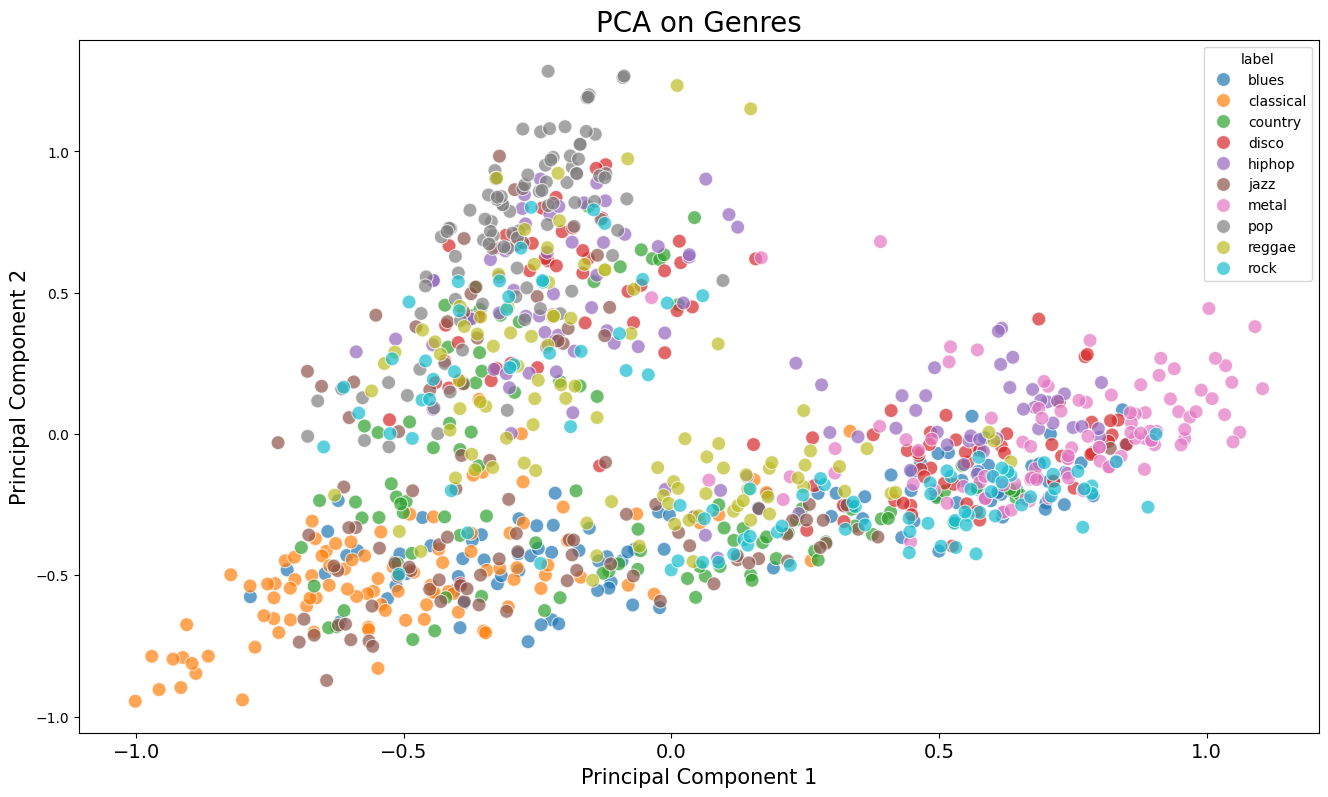

In [21]:
import sklearn.preprocessing as skp
data = features_df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'tempo'),
  Text(0, 9.5, 'mfcc_1'),
  Text(0, 10.5, 'mfcc_2'),
  Text(0, 11.5, 'mfcc_3'),
  Text(0, 12.5, 'mfcc_4'),
  Text(0, 13.5, 'mfcc_5'),
  Text(0, 14.5, 'mfcc_6'),
  Text(0, 15.5, 'mfcc_7'),
  Text(0, 16.5, 'mfcc_8'),
  Text(0, 17.5, 'mfcc_9'),
  Text(0, 18.5, 'mfcc_10'),
  Text(0, 19.5, 'mfcc_11'),
  Text(0, 20.5, 'mfcc_12'),
  Text(0, 21.5, 'mfcc_13'),
  Text(0, 22.5, 'mfcc_14'),
  Text(0, 23.5, 'mfcc_15'),
  Text(0, 24.5, 'mfcc_16'),
  Text(0, 25.5, 'mfcc_17'),
  Text(0, 26.5, 'mfc

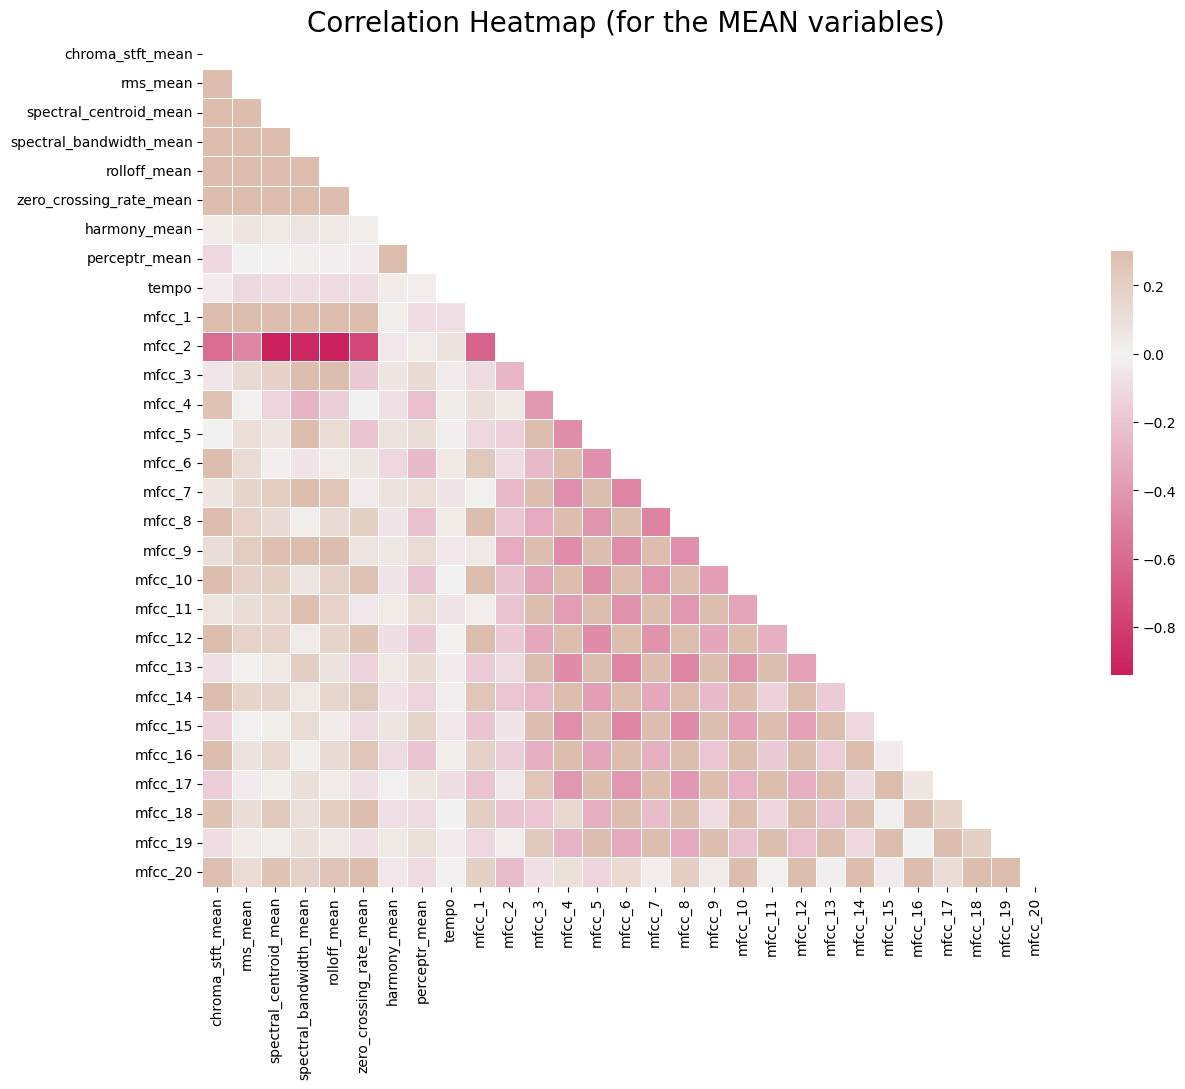

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Computing the Correlation Matrix
numeric_cols = features_df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

In [25]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 999 non-null    object 
 1   chroma_stft_mean         999 non-null    float32
 2   rms_mean                 999 non-null    float32
 3   spectral_centroid_mean   999 non-null    float64
 4   spectral_bandwidth_mean  999 non-null    float64
 5   rolloff_mean             999 non-null    float64
 6   zero_crossing_rate_mean  999 non-null    float64
 7   harmony_mean             999 non-null    float32
 8   perceptr_mean            999 non-null    float32
 9   tempo                    999 non-null    float64
 10  mfcc_1                   999 non-null    float32
 11  mfcc_2                   999 non-null    float32
 12  mfcc_3                   999 non-null    float32
 13  mfcc_4                   999 non-null    float32
 14  mfcc_5                   9

# Building models

In [81]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Drop the filename column
df = features_df.drop('filename', axis=1)

# Encode the labels (target column)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Separate features and target
X = df.drop('label', axis=1)  # Features
y = df['label']              # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (799, 29)
Testing set size: (200, 29)


In [82]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing features
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")


Features scaled successfully!


# Training SVM Model

In [28]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

print("SVM model trained successfully!")


SVM model trained successfully!


Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

       blues       0.67      0.67      0.67        21
   classical       0.73      0.92      0.81        12
     country       0.65      0.71      0.68        24
       disco       0.62      0.68      0.65        22
      hiphop       0.60      0.80      0.69        15
        jazz       0.88      0.78      0.82        27
       metal       0.75      0.83      0.79        18
         pop       0.80      0.84      0.82        19
      reggae       0.82      0.64      0.72        22
        rock       0.54      0.35      0.42        20

    accuracy                           0.71       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.71      0.71      0.71       200



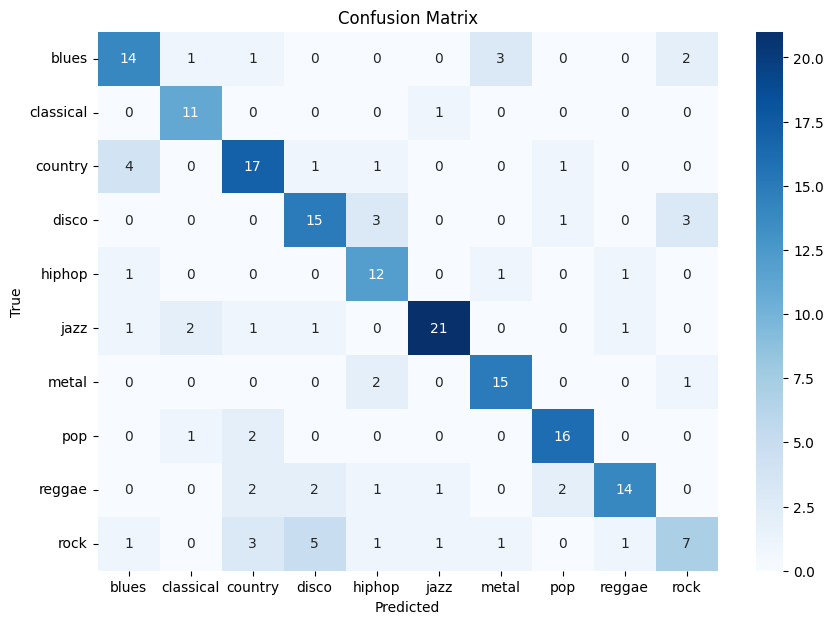

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [39]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
print("Linear SVM Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test_scaled)))

svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train_scaled, y_train)
print("Polynomial SVM Accuracy:", accuracy_score(y_test, svm_poly.predict(X_test_scaled)))


Linear SVM Accuracy: 0.66
Polynomial SVM Accuracy: 0.685


# Training Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.705



Classification Report:
              precision    recall  f1-score   support

       blues       0.63      0.57      0.60        21
   classical       0.71      1.00      0.83        12
     country       0.76      0.67      0.71        24
       disco       0.68      0.68      0.68        22
      hiphop       0.52      0.80      0.63        15
        jazz       0.82      0.85      0.84        27
       metal       0.65      0.72      0.68        18
         pop       0.89      0.84      0.86        19
      reggae       0.82      0.64      0.72        22
        rock       0.53      0.40      0.46        20

    accuracy                           0.70       200
   macro avg       0.70      0.72      0.70       200
weighted avg       0.71      0.70      0.70       200



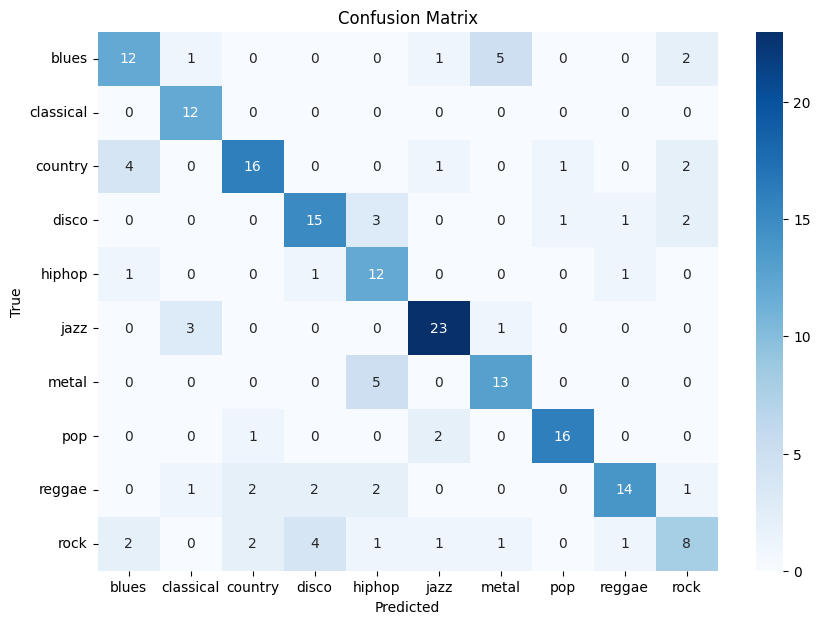

In [32]:



# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)




XGBoost Accuracy: 0.69


XGBoost Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

       blues       0.50      0.52      0.51        21
   classical       0.71      1.00      0.83        12
     country       0.68      0.62      0.65        24
       disco       0.58      0.64      0.61        22
      hiphop       0.65      0.87      0.74        15
        jazz       0.82      0.85      0.84        27
       metal       0.62      0.83      0.71        18
         pop       0.94      0.84      0.89        19
      reggae       0.92      0.55      0.69        22
        rock       0.54      0.35      0.42        20

    accuracy                           0.69       200
   macro avg       0.70      0.71      0.69       200
weighted avg       0.70      0.69      0.68       200



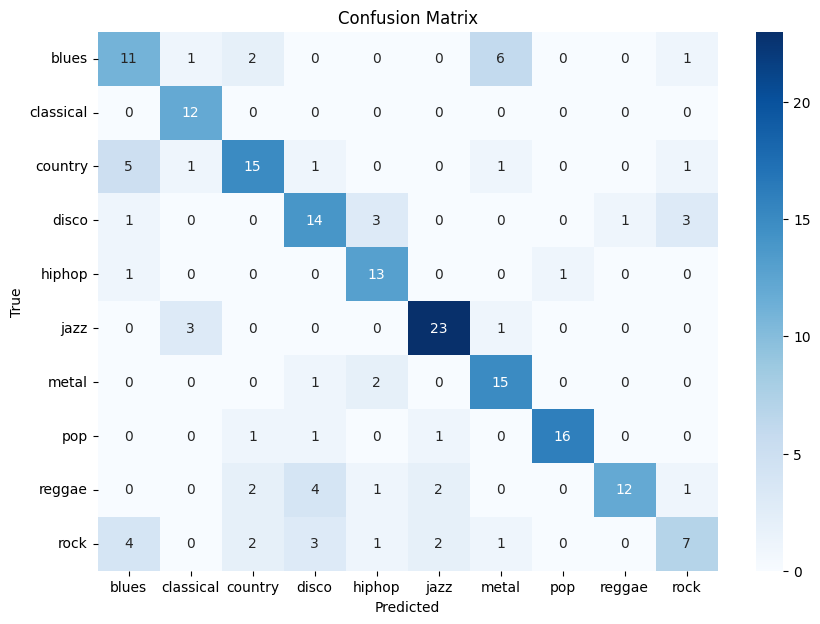

In [36]:
# Evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Training KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred_knn = knn_model.predict(X_test_scaled)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))


k-NN Accuracy: 0.665


In [38]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_model = LogisticRegression(max_iter=200, random_state=42)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.64


In [40]:
from sklearn.metrics import accuracy_score

# Dictionary to store model names and their accuracies
model_performance = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "k-NN": accuracy_score(y_test, y_pred_knn),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "SVM": accuracy_score(y_test, svm_model.predict(X_test_scaled)),
    "SVM (Polynomial)": accuracy_score(y_test, svm_poly.predict(X_test_scaled)),
}

# Print comparison
for model, acc in model_performance.items():
    print(f"{model}: {acc:.2f}")


Random Forest: 0.70
XGBoost: 0.69
k-NN: 0.67
Logistic Regression: 0.64
SVM: 0.71
SVM (Polynomial): 0.69


# Training CNN

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [62]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_train.shape

(799, 29)

In [46]:
# Reshape the data for CNN input (e.g., 20 MFCCs -> shape (samples, 20, 1))
X_train = X_train.reshape(X_train.shape[0], 29, 1, 1)  # Assuming 20 features per sample
X_test = X_test.reshape(X_test.shape[0], 29, 1, 1)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (799, 29, 1, 1)
Testing data shape: (200, 29, 1, 1)


In [50]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(29, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("CNN Model Summary:")
model.summary()


CNN Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 27, 1, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 1, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,714 (190.29 KB)

 Trainable params: 48,714 (190.29 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1515 - loss: 2.2927 - val_accuracy: 0.2350 - val_loss: 2.1424
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2635 - loss: 2.0678 - val_accuracy: 0.3000 - val_loss: 1.9446
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3313 - loss: 1.9229 - val_accuracy: 0.3450 - val_loss: 1.7962
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3639 - loss: 1.7819 - val_accuracy: 0.3950 - val_loss: 1.7045
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3925 - loss: 1.6790 - val_accuracy: 0.4400 - val_loss: 1.6597
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4116 - loss: 1.6843 - val_accuracy: 0.4300 - val_loss: 1.6405
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4605 - loss: 1.5925 - val_accuracy: 0.4500 - val_loss: 1.6150
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4788 - loss: 1.5403 - val_accuracy: 0.4450 - val_loss: 1.5733
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6178 - loss: 1.2002 
Test Loss: 1.1433
Test Accuracy: 0.6300


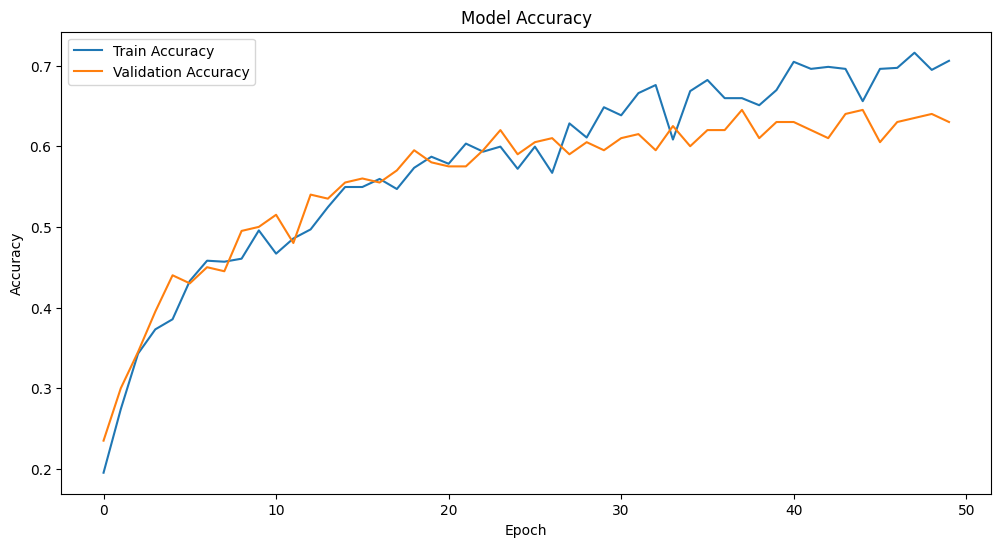

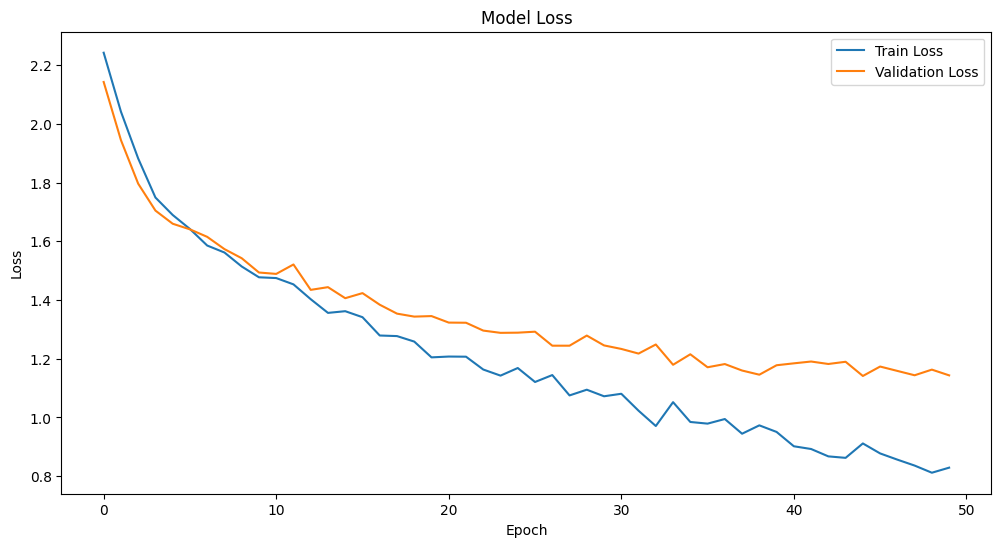

In [52]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Classification Report:
              precision    recall  f1-score   support

       blues       0.58      0.71      0.64        21
   classical       0.71      1.00      0.83        12
     country       0.46      0.50      0.48        24
       disco       0.67      0.64      0.65        22
      hiphop       0.69      0.73      0.71        15
        jazz       0.70      0.52      0.60        27
       metal       0.65      0.83      0.73        18
         pop       0.82      0.74      0.78        19
      reggae       0.68      0.59      0.63        22
        rock       0.40      0.30      0.34        20

    accuracy                           0.63       200
   macro avg       0.64      0.66      0.64       200
weighted avg       0.63      0.63      0.62       200



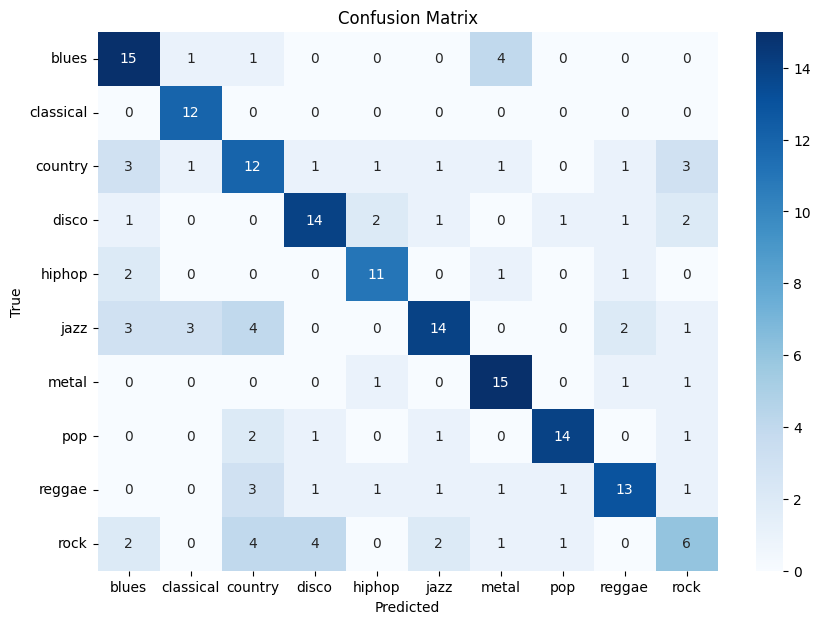

In [53]:
# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the index of the highest probability
y_true = np.argmax(y_test, axis=1)        # True class labels (one-hot to label index)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Optimization 

### Issue Noticed
- Rock and country class
- implementing class weighting
- L2
- Adam


In [64]:
# Convert labels to one-hot encoding
X_train = X_train_scaled.reshape(X_train.shape[0], 29, 1, 1)  # Assuming 20 features per sample
X_test = X_test_scaled.reshape(X_test.shape[0], 29, 1, 1)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [65]:
from sklearn.utils.class_weight import compute_class_weight
# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)

# Convert to dictionary format
class_weights = {i: weight for i, weight in enumerate(class_weights)}
print("Class Weights:", class_weights)


Class Weights: {0: np.float64(0.999), 1: np.float64(0.999), 2: np.float64(0.999), 3: np.float64(0.999), 4: np.float64(0.999), 5: np.float64(1.009090909090909), 6: np.float64(0.999), 7: np.float64(0.999), 8: np.float64(0.999), 9: np.float64(0.999)}


In [66]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 1), activation='relu', kernel_regularizer=l2(0.001), input_shape=(29, 1, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 1), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print("Model Summary:")
model.summary()


Model Summary:


c:\Drive D\Downloads\Lambton College\Semester 3\Deep Neural Network\Project\Music_classification\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 27, 1, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 27, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 13, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 1, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,098 (191.79 KB)

 Trainable params: 48,906 (191.04 KB)

 Non-trainable params: 192 (768.00 B)

In [67]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop after 10 epochs of no improvement
    restore_best_weights=True
)


In [68]:
history = model.fit(
    X_train, y_train,
    epochs=100,            # Max epochs
    batch_size=32,         # Batch size
    validation_data=(X_test, y_test),
    class_weight=class_weights,  # Apply class weights
    callbacks=[early_stopping]   # Use early stopping
)


Epoch 1/100


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1321 - loss: 3.4706 - val_accuracy: 0.2850 - val_loss: 2.4332
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3075 - loss: 2.3486 - val_accuracy: 0.3650 - val_loss: 2.3108
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3929 - loss: 2.0341 - val_accuracy: 0.3700 - val_loss: 2.2132
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4473 - loss: 1.8763 - val_accuracy: 0.3750 - val_loss: 2.1367
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4833 - loss: 1.7228 - val_accuracy: 0.3750 - val_loss: 2.0778
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4806 - loss: 1.7791 - val_accuracy: 0.4000 - val_loss: 2.0072
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5120 - loss: 1.6304 - val_accuracy: 0.4050 - val_loss: 1.9654
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4956 - loss: 1.6928 - val_accuracy: 0.4700 - val_loss: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6589 - loss: 1.3151
Test Loss: 1.2252
Test Accuracy: 0.6800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Classification Report:
              precision    recall  f1-score   support

       blues       0.88      0.67      0.76        21
   classical       0.75      1.00      0.86        12
     country       0.58      0.75      0.65        24
       disco       0.65      0.59      0.62        22
      hiphop       0.63      0.80      0.71        15
        jazz       0.94      0.63      0.76        27
       metal       0.65      0.72      0.68        18
         pop       0.73      0.84      0.78        19
      reggae       0.72      0.59      0.65        22
        rock       0.40      0.40      0.40        20

    accuracy                           0.68       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.70      0.68      0.68       200



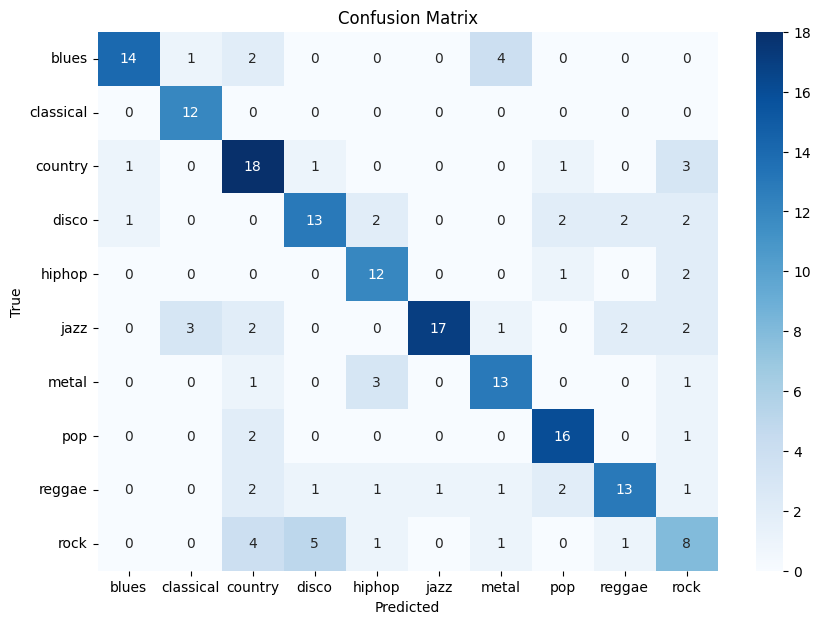

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Spectrogram-based CNNs

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the spectrogram images directory
image_dir = './Data/images_original'

# Image dimensions (adjust as needed based on your image size)
img_width, img_height = 128, 128

# Data generators for training and validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 800 images belonging to 10 classes.


Found 199 images belonging to 10 classes.


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model Summary:")
model.summary()


Model Summary:


c:\Drive D\Downloads\Lambton College\Semester 3\Deep Neural Network\Project\Music_classification\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,826 (12.61 MB)

 Trainable params: 3,306,378 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


c:\Drive D\Downloads\Lambton College\Semester 3\Deep Neural Network\Project\Music_classification\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 675ms/step - accuracy: 0.1553 - loss: 8.7455 - val_accuracy: 0.1005 - val_loss: 4.1547
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 384ms/step - accuracy: 0.1229 - loss: 2.2771 - val_accuracy: 0.0402 - val_loss: 8.6056
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.1385 - loss: 2.2535 - val_accuracy: 0.1206 - val_loss: 11.9457
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.1251 - loss: 2.2492 - val_accuracy: 0.1005 - val_loss: 17.5530
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 458ms/step - accuracy: 0.1296 - loss: 2.2262 - val_accuracy: 0.1005 - val_loss: 25.8491
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 458ms/step - accuracy: 0.1533 - loss: 2.2189 - val_accuracy: 0.1005 - val_loss: 28.8114
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 444ms/step - accuracy: 0.1324 - loss: 2.2351 - val_accuracy: 0.1005 - val_loss: 29.8889
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.1558 - loss: 2.2387 - val

In [74]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.0994 - loss: 4.1041 
Validation Accuracy: 0.10


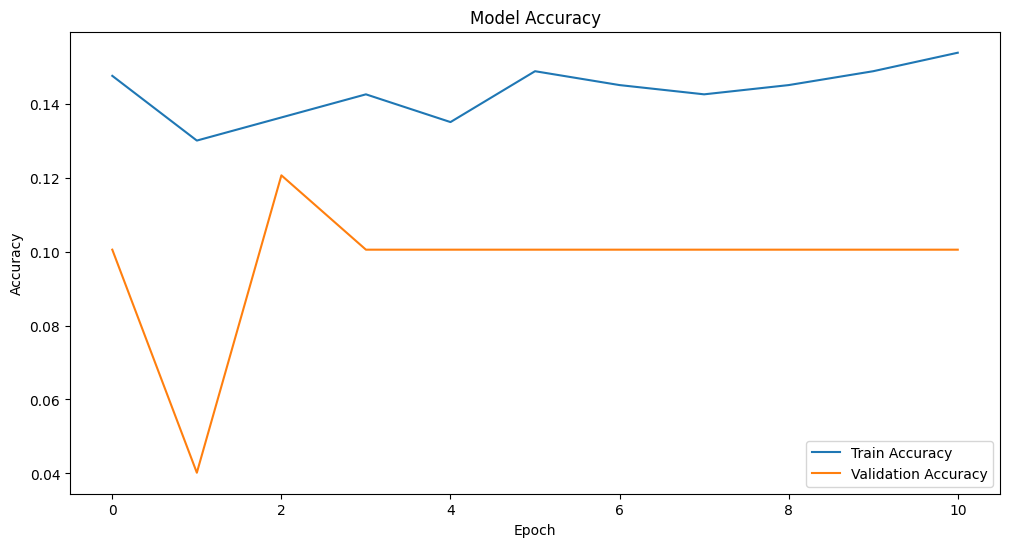

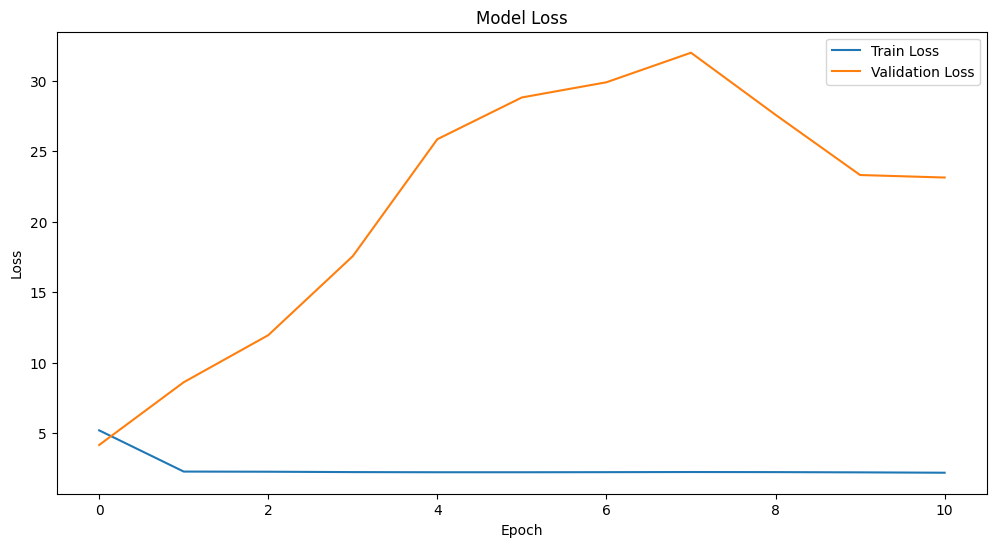

In [75]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# optimizing random forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Random Forest Accuracy: 0.515


In [78]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.48      0.43        21
           1       0.63      1.00      0.77        12
           2       0.53      0.38      0.44        24
           3       0.52      0.55      0.53        22
           4       0.57      0.80      0.67        15
           5       0.60      0.33      0.43        27
           6       0.71      0.67      0.69        18
           7       0.81      0.68      0.74        19
           8       0.56      0.41      0.47        22
           9       0.28      0.25      0.26        20

   micro avg       0.55      0.52      0.53       200
   macro avg       0.56      0.55      0.54       200
weighted avg       0.56      0.52      0.52       200
 samples avg       0.52      0.52      0.52       200



c:\Drive D\Downloads\Lambton College\Semester 3\Deep Neural Network\Project\Music_classification\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 283}
Optimized Random Forest Accuracy: 0.7



Classification Report:
              precision    recall  f1-score   support

       blues       0.60      0.57      0.59        21
   classical       0.71      1.00      0.83        12
     country       0.74      0.71      0.72        24
       disco       0.70      0.73      0.71        22
      hiphop       0.52      0.73      0.61        15
        jazz       0.84      0.78      0.81        27
       metal       0.65      0.72      0.68        18
         pop       0.89      0.84      0.86        19
      reggae       0.76      0.73      0.74        22
        rock       0.50      0.30      0.38        20

    accuracy                           0.70       200
   macro avg       0.69      0.71      0.69       200
weighted avg       0.70      0.70      0.69       200



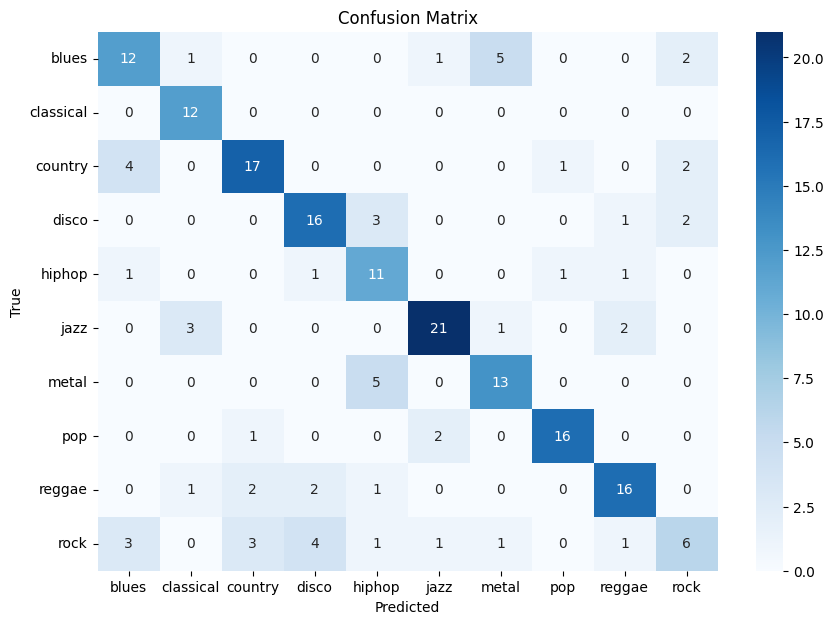

In [84]:



# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [85]:
import joblib

# Save the model
joblib.dump(best_rf, 'optimized_random_forest_model.pkl')

['optimized_random_forest_model.pkl']

In [86]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [87]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']